In [60]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [61]:
months = ["JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"]
month_values = [14, 2, 18, 18, 25, 14, 12, 7, 16, 20, 22, 3]

In [79]:
# randomly sample from month_values uniformly at random, keeping track of the best value so far
num_trials = 1000

In [80]:
# stopping rule: randomly with probability 
stop_proba = 0.2

result = pd.DataFrame(columns=["value", "order", "trial", "highest_value_so_far", "did_continue_eval"])
for i in range(num_trials):
    options_not_yet_considered = set(month_values)
    j = 0
    highest_value_so_far = 0
    while options_not_yet_considered:
        option = random.sample(options_not_yet_considered, 1)[0]
        highest_value_so_far = max(highest_value_so_far, option)
        
        options_not_yet_considered.remove(option)
        quit = np.random.binomial(1, stop_proba) == 0
        if quit:
            options_not_yet_considered = set([])
        
        result = result.append({"value": option, "order": j, "trial": i, "highest_value_so_far": highest_value_so_far, "did_continue_eval": not quit}, ignore_index=True)
        j += 1

In [81]:
result = result.astype({'did_continue_eval': 'bool'})

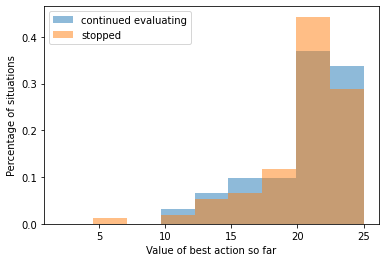

In [82]:
order_filter = 2
filtered_result = result[result["order"]==order_filter]

minimum = min(month_values)
maximim = max(month_values)
non_last_eval = filtered_result.loc[filtered_result["did_continue_eval"], "highest_value_so_far"]
last_eval = filtered_result.loc[~filtered_result["did_continue_eval"], "highest_value_so_far"]

bins = np.linspace(minimum, maximim, 10)

plt.hist(non_last_eval, bins, alpha=0.5, label='continued evaluating', weights=np.ones(len(non_last_eval)) / len(non_last_eval))
plt.hist(last_eval, bins, alpha=0.5, label='stopped', weights=np.ones(len(last_eval)) / len(last_eval))
plt.legend(loc='upper left')
plt.xlabel("Value of best action so far")
plt.ylabel("Percentage of situations")
plt.show()

In [29]:
# stopping rule: threshold